# Import Library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read Dataset
data = pd.read_csv('data_kartu_kredit.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# From the table above shown data set credit card.
1. Column time is showing transactions time
2. Column V1-V28 (as V) is data that can be in the form of user age data, transactions, money etc.
   Column V data has been standardized centered on an average of 0
3. Column Amount is amount of transactions in dollars
4. Column Class is transaction fraud prediction data(0 = honest, 1 = fraud)

In [3]:
data.shape

(284807, 31)

# Data Cleaning

In [4]:
data.drop_duplicates(inplace = True)

In [5]:
data.shape

(283726, 31)

# EDA

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


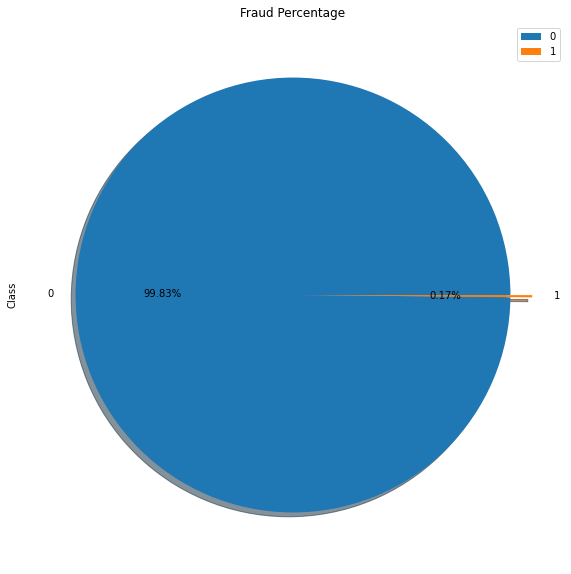

In [7]:
plt.figure(figsize=(10,10))
data['Class'].value_counts().plot.pie(shadow=True, explode = [0,0.1],autopct='%1.2f%%')
plt.title("Fraud Percentage")
plt.legend()
plt.show()

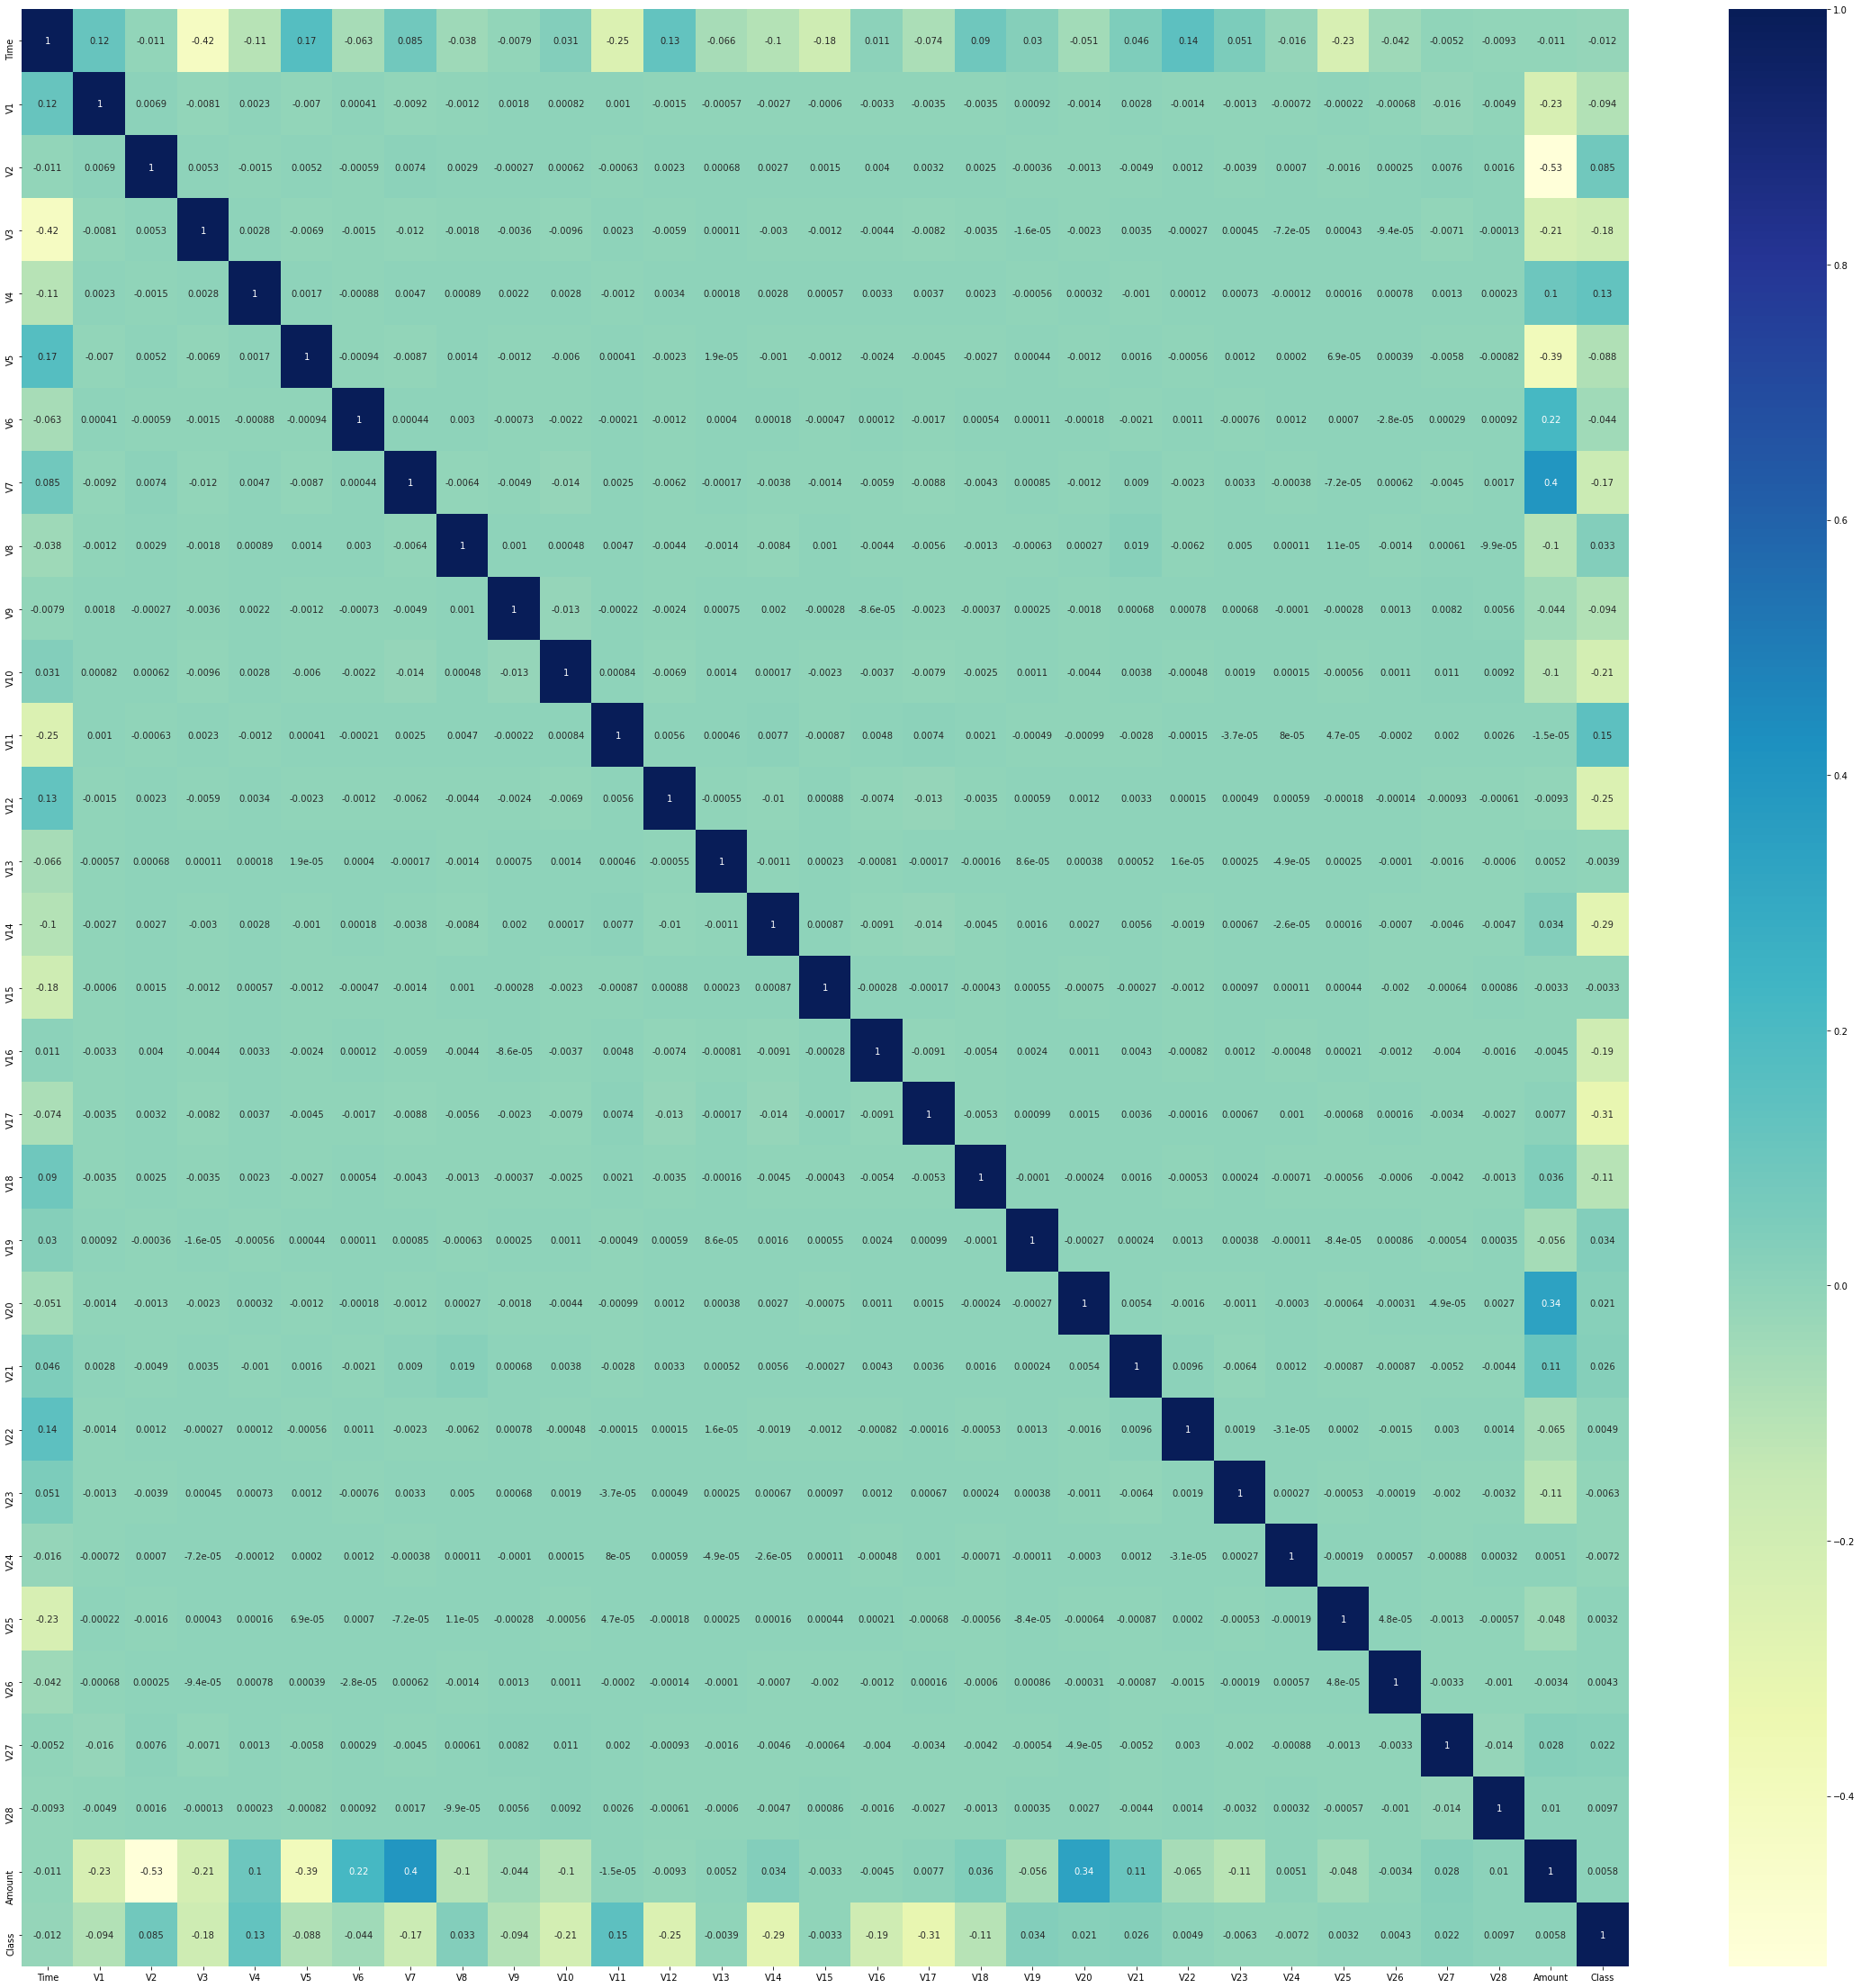

In [8]:
plt.figure(figsize = (40, 40))
sns.heatmap(data.corr(), 
            annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

# Feature Scaling

The amount data in the table is still in dollars, not the same scale as the data in other columns. therefore, it is necessary to standardize the data

In [9]:
#Standardize Column Amount
from sklearn.preprocessing import StandardScaler
data['standar'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [10]:
#Define dependent variable (y) and independent variable (X)
y = np.array(data.iloc[:,-2])
#Drop unnecessary data (data is not standardized)
X = np.array(data.drop(['Time', 'Amount', 'Class'], axis=1))

# Data Partition

In [11]:
#Split train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 111)

In [12]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                            test_size = 0.2,
                                                            random_state = 111)

# Modeling

In [13]:
#Design ANN model
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [14]:
classifier = Sequential()
classifier.add(Dense(units = 16, input_dim = 29, activation = 'relu'))
classifier.add(Dense(units = 24, activation = 'relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(units = 20, activation = 'relu'))
classifier.add(Dense(units = 24, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics =['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [15]:
#Training ANN model
run_model = classifier.fit(X_train, y_train,
                           batch_size = 32, epochs = 5, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/5
5675/5675 [==============================] - 15s 3ms/step - loss: 0.0146 - accuracy: 0.9971 - val_loss: 0.0043 - val_accuracy: 0.9989
Epoch 2/5
5675/5675 [==============================] - 16s 3ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 3/5
5675/5675 [==============================] - 14s 2ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 4/5
5675/5675 [==============================] - 17s 3ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 5/5
5675/5675 [==============================] - 14s 2ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0040 - val_accuracy: 0.9992


In [16]:
#View saved parameters
print(run_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


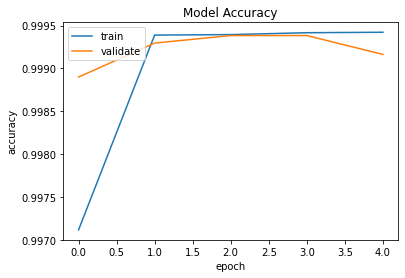

In [17]:
#Plot accuracy training and validation sets
plt.plot(run_model.history['accuracy'])
plt.plot(run_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc = 'upper left')
plt.show()

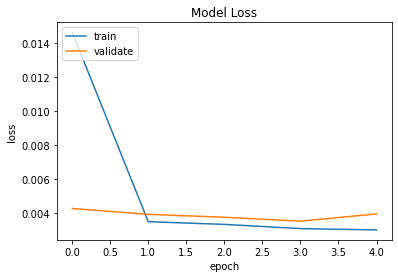

In [18]:
#Plot loss training dan validation set
plt.plot(run_model.history['loss'])
plt.plot(run_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc = 'upper left')
plt.show()

In [19]:
#Evaluate ANN model
evaluasi = classifier.evaluate(X_test, y_test)
print('Akurasi:{:.2f}'.format(evaluasi[1]*100))

1774/1774 [==============================] - 3s 1ms/step - loss: 0.0032 - accuracy: 0.9992
Akurasi:99.92


In [20]:
#Predict test set
hasil_prediksi = classifier.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [21]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, hasil_prediksi)
cm_label = pd.DataFrame(cm, columns = np.unique(y_test), index = np.unique(y_test))
cm_label.index.name = 'Aktual'
cm_label.columns.name = 'Prediksi'


<AxesSubplot:xlabel='Prediksi', ylabel='Aktual'>

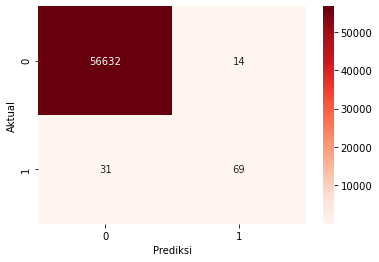

In [22]:
#Confusion matrix with seaborn
sns.heatmap(cm_label, annot=True, cmap = 'Reds', fmt = 'g')

In [23]:
#Classification report
from sklearn.metrics import classification_report
jumlah_kategori = 2
target_names = ['Class {}'.format(i) for i in range(jumlah_kategori)]
print(classification_report(y_test, hasil_prediksi, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     56646
     Class 1       0.83      0.69      0.75       100

    accuracy                           1.00     56746
   macro avg       0.92      0.84      0.88     56746
weighted avg       1.00      1.00      1.00     56746



In [24]:
#Undersampling method
index_fraud = np.array(data[data.Class==1].index)
n_fraud = len(index_fraud)
index_normal = np.array(data[data.Class==0].index)
index_data_normal = np.random.choice(index_normal, n_fraud, replace = False)
index_data_baru = np.concatenate([index_fraud, index_data_normal])
data_baru = data.loc[index_data_baru, :]

In [25]:
#Classified dependent variable and idependent variable
y_baru = np.array(data_baru.iloc[:,-2])
X_baru = np.array(data_baru.drop(['Time', 'Amount', 'Class'], axis = 1))

In [26]:
#Split train and test set
X_train2, X_test_final, y_train2, y_test_final = train_test_split(X_baru, y_baru, test_size = 0.1,
                                                                 random_state = 111)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2, y_train2, test_size = 0.1,
                                                                 random_state = 111)
X_train2, X_validate2, y_train2, y_validate2 = train_test_split(X_train2, y_train2, test_size = 0.2,
                                                                 random_state = 111)


In [27]:
#Design new ANN model
classifier2 = Sequential()
classifier2.add(Dense(units = 16, input_dim = 29, activation = 'relu'))
classifier2.add(Dense(units = 24, activation = 'relu'))
classifier2.add(Dropout(0.25))
classifier2.add(Dense(units = 20, activation = 'relu'))
classifier2.add(Dense(units = 24, activation = 'relu'))
classifier2.add(Dense(units = 1, activation = 'sigmoid'))
classifier2.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics =['accuracy'])
classifier2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_8 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [28]:
#Training new ANN model
run_model2 = classifier2.fit(X_train2, y_train2,
                           batch_size = 8, epochs = 5, verbose = 1, validation_data = (X_validate2, y_validate2))

Epoch 1/5
77/77 [==============================] - 1s 10ms/step - loss: 0.4620 - accuracy: 0.7712 - val_loss: 0.3514 - val_accuracy: 0.9085
Epoch 2/5
77/77 [==============================] - 0s 3ms/step - loss: 0.2840 - accuracy: 0.9297 - val_loss: 0.2053 - val_accuracy: 0.9412
Epoch 3/5
77/77 [==============================] - 0s 3ms/step - loss: 0.2015 - accuracy: 0.9314 - val_loss: 0.1671 - val_accuracy: 0.9412
Epoch 4/5
77/77 [==============================] - 0s 3ms/step - loss: 0.1817 - accuracy: 0.9281 - val_loss: 0.1567 - val_accuracy: 0.9412
Epoch 5/5
77/77 [==============================] - 0s 5ms/step - loss: 0.1481 - accuracy: 0.9461 - val_loss: 0.1497 - val_accuracy: 0.9346


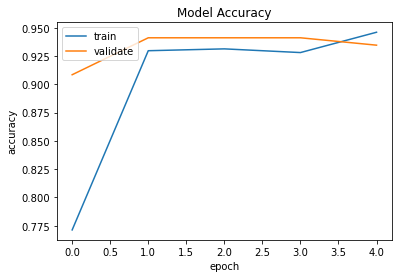

In [29]:
#Plot accuracy training and validation sets
plt.plot(run_model2.history['accuracy'])
plt.plot(run_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc = 'upper left')
plt.show()

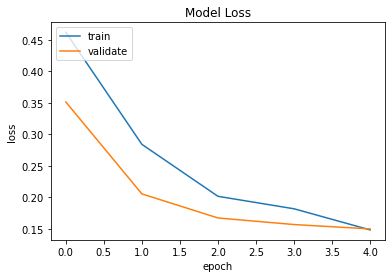

In [30]:
#Plot loss training dan validation set
plt.plot(run_model2.history['loss'])
plt.plot(run_model2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc = 'upper left')
plt.show()

In [31]:
#Evaluate new ANN model
evaluasi2 = classifier2.evaluate(X_test2, y_test2)
print('Akurasi:{:.2f}'.format(evaluasi2[1]*100))

3/3 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9186
Akurasi:91.86


In [32]:
#Predict test set
hasil_prediksi2 = classifier2.predict_classes(X_test2)

<AxesSubplot:xlabel='Prediksi', ylabel='Aktual'>

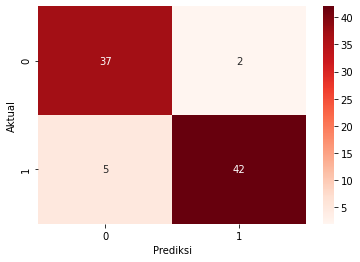

In [33]:
#confusion matrix

cm2 = confusion_matrix(y_test2, hasil_prediksi2)
cm_label2 = pd.DataFrame(cm2, columns = np.unique(y_test2), index = np.unique(y_test2))
cm_label2.index.name = 'Aktual'
cm_label2.columns.name = 'Prediksi'
#Confusion matrix with seaborn
sns.heatmap(cm_label2, annot=True, cmap = 'Reds', fmt = 'g')

In [34]:
#Classification report

print(classification_report(y_test2, hasil_prediksi2, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.95      0.91        39
     Class 1       0.95      0.89      0.92        47

    accuracy                           0.92        86
   macro avg       0.92      0.92      0.92        86
weighted avg       0.92      0.92      0.92        86



<AxesSubplot:xlabel='Prediksi', ylabel='Aktual'>

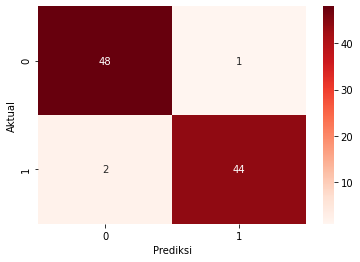

In [35]:
#Predict test set final
hasil_prediksi3 = classifier2.predict_classes(X_test_final)
cm3 = confusion_matrix(y_test_final, hasil_prediksi3)
cm_label3 = pd.DataFrame(cm3, columns = np.unique(y_test_final), index = np.unique(y_test_final))
cm_label3.index.name = 'Aktual'
cm_label3.columns.name = 'Prediksi'
#Confusion matrix with seaborn
sns.heatmap(cm_label3, annot=True, cmap = 'Reds', fmt = 'g')

In [36]:
#Classification report

print(classification_report(y_test_final, hasil_prediksi3, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.96      0.98      0.97        49
     Class 1       0.98      0.96      0.97        46

    accuracy                           0.97        95
   macro avg       0.97      0.97      0.97        95
weighted avg       0.97      0.97      0.97        95



In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_final, hasil_prediksi3)

0.9680567879325643

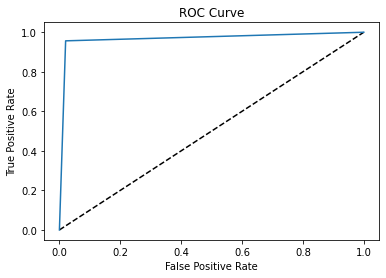

In [39]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_final, hasil_prediksi3)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()